# Assignment-13: Try various CNN networks on MNIST dataset


Three different architecture of CNN network on MNIST datasets.MNIST datasets contains handwritten images .



Objective:
1.   3_ConvNets with kernel 3x3
2.   5_ConvNets with kernel 5x5
3.   7_ConvnNets with kernel 2x2



In [1]:
# Credits: https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py

from datetime import datetime
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

from keras.initializers import he_normal
from keras.layers.normalization import BatchNormalization


batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28


Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


In [3]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [4]:
print(y_train.shape)

(60000, 10)


In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty):
  fig = plt.figure( facecolor='y', edgecolor='k')
  plt.plot(x, vy, 'b', label="Validation Loss")
  plt.plot(x, ty, 'r', label="Train Loss")
  plt.xlabel('Epochs') 
  plt.ylabel('Categorical Crossentropy Loss')
  plt.legend()
  plt.grid()
  plt.show()

### 1 Model 1:CNN with 3 ConvNet & 3x3 kernel size


In [6]:
convnet3=Sequential() # Initializing the model

# First ConvNet
convnet3.add(Conv2D(32,kernel_size=(3,3),
                    activation='relu',
                    input_shape=input_shape))

convnet3.add(Conv2D(64,kernel_size=(3,3),
                    activation='relu'))

convnet3.add(Dropout(0.25))

convnet3.add(Conv2D(128,kernel_size=(3,3),
                   activation='relu'))
#maxpooling by (2,2 ) ,dropout,flattening
convnet3.add(MaxPooling2D(pool_size=(2,2)))
convnet3.add(Dropout(0.25))
convnet3.add(Flatten())

#hidden_layer
convnet3.add(Dense(256,
                   activation='relu',
                   kernel_initializer=he_normal(seed=None)))
convnet3.add(Dropout(0.5))
convnet3.add(Dense(num_classes,activation='softmax'))
print(convnet3.summary())





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
dropout_1 (Dropout)          (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 128)       0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 11, 11, 128)       0         

In [7]:
#Model compilation
convnet3.compile(optimizer=keras.optimizers.Adam(),
                loss=keras.losses.categorical_crossentropy,
                metrics=['accuracy'])
convnet3_history=convnet3.fit(x_train,y_train,batch_size=batch_size,
                             epochs=epochs,
                             verbose=1,
                             validation_data=(x_test, y_test))



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/12





60000/60000 [==============================] - 28s 460us/step - loss: 0.1847 - acc: 0.9423 - val_loss: 0.0396 - val_acc: 0.9873
Epoch 2/12
60000/60000 [==============================] - 20s 335us/step - loss: 0.0621 - acc: 0.9812 - val_loss: 0.0314 - val_acc: 0.9891
Epoch 3/12
60000/60000 [==============================] - 20s 335us/step - loss: 0.0460 - acc: 0.9860 - val_loss: 0.0276 - val_acc: 0.9904
Epoch 4/12
60000/60000 [==============================] - 20s 336us/step - loss: 0.0370 - acc: 0.9879 - val_loss: 0.0264 - val_acc: 0.9906
Epoch 5/12
60000/60000 [==============================] - 20s 337us/step - loss: 0.0309 - acc: 0.9901 - val_loss: 0.0210 - val_acc: 0.9922
Epoch 6/12
60000/60000 [==============================] - 20s 333us/step - loss: 0.0269 - acc: 0.9916 - val_loss: 0.0219 - val_acc: 0.9933
Epoch 7/12
6

test score : 0.022394076778412635
test sccuracy : 0.9938


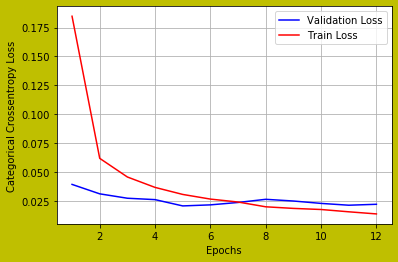

In [8]:
#evaluating model

score=convnet3.evaluate(x_test,y_test,verbose=0)
test_score3=score[0]
test_accuracy3=score[1]
train_accuracy3=max(convnet3_history.history['acc'])
print('test score :',test_score3)
print('test sccuracy :',test_accuracy3)
# error plot
x=list(range(1,epochs+1))
vy=convnet3_history.history['val_loss'] #validation loss
ty=convnet3_history.history['loss'] # train loss
plt_dynamic(x, vy, ty)

### 2 Model2:CNN with 5 ConvNet & kernel_size=(5x5)

> 5 convNet followed by maxpooling(2,2) and dropout




In [9]:
convnet5=Sequential() # Initializing the model

# First ConvNet
convnet5.add(Conv2D(32,kernel_size=(5,5),
                    activation='relu',
                    padding='same',
                    input_shape=input_shape))

convnet5.add(Conv2D(64,kernel_size=(5,5),
                    padding='same',
                    activation='relu'))#Second Convnet
convnet5.add(MaxPooling2D(pool_size=(2,2)))
convnet5.add(Dropout(0.25))

convnet5.add(Conv2D(96,kernel_size=(5,5),
                    padding='same',
                   activation='relu'))  # 3rd ConvNet
#maxpooling by (2,2 ) ,dropout,flattening
convnet5.add(MaxPooling2D(pool_size=(2,2)))
convnet5.add(Dropout(0.25))

convnet5.add(Conv2D(128,kernel_size=(5,5),
                    padding='same',
                    activation='relu'))#fourth Convnet
convnet5.add(MaxPooling2D(pool_size=(2,2)))
convnet5.add(Dropout(0.25))
convnet5.add(Conv2D(164,kernel_size=(5,5),
                    padding='same',
                    activation='relu'))#fifth Convnet
convnet5.add(MaxPooling2D(pool_size=(2,2)))
convnet5.add(Dropout(0.25))
convnet5.add(Flatten())

#hidden_layer
convnet5.add(Dense(256,
                   activation='relu',
                   kernel_initializer=he_normal(seed=None)))
convnet5.add(BatchNormalization())
convnet5.add(Dropout(0.5))
convnet5.add(Dense(num_classes,activation='softmax'))
print(convnet5.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 28, 64)        51264     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 14, 14, 96)        153696    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 96)          0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 7, 7, 96)         

In [10]:
#Model compilation
start = datetime.now()
convnet5.compile(optimizer=keras.optimizers.Adam(),
                loss=keras.losses.categorical_crossentropy,
                metrics=['accuracy'])
convnet5_history=convnet5.fit(x_train,y_train,batch_size=batch_size,
                             epochs=epochs,
                             verbose=1,
                             validation_data=(x_test, y_test))
print("Time taken to run this cell :", datetime.now() - start)

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 24s 400us/step - loss: 0.2883 - acc: 0.9074 - val_loss: 0.0402 - val_acc: 0.9876
Epoch 2/12
60000/60000 [==============================] - 22s 368us/step - loss: 0.0686 - acc: 0.9798 - val_loss: 0.0346 - val_acc: 0.9900
Epoch 3/12
60000/60000 [==============================] - 22s 368us/step - loss: 0.0499 - acc: 0.9858 - val_loss: 0.0253 - val_acc: 0.9919
Epoch 4/12
60000/60000 [==============================] - 22s 366us/step - loss: 0.0409 - acc: 0.9882 - val_loss: 0.0268 - val_acc: 0.9920
Epoch 5/12
60000/60000 [==============================] - 22s 368us/step - loss: 0.0362 - acc: 0.9896 - val_loss: 0.0228 - val_acc: 0.9941
Epoch 6/12
60000/60000 [==============================] - 22s 366us/step - loss: 0.0298 - acc: 0.9914 - val_loss: 0.0232 - val_acc: 0.9929
Epoch 7/12
60000/60000 [==============================] - 22s 371us/step - loss: 0.0263 - acc: 0.9921 - val_loss: 0.

test score : 0.01892038440361739
test Accuracy : 0.9951


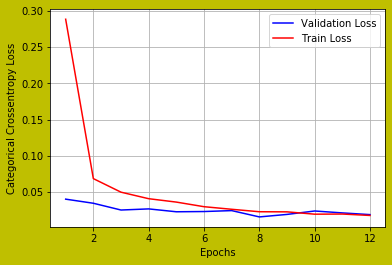

In [11]:
#evaluating model
score=convnet5.evaluate(x_test,y_test,verbose=0)
test_score5=score[0]
test_accuracy5=score[1]
train_accuracy5=max(convnet5_history.history['acc'])
print('test score :',test_score5)
print('test Accuracy :',test_accuracy5)
# error plot
x=list(range(1,epochs+1))
vy=convnet5_history.history['val_loss'] #validation loss
ty=convnet5_history.history['loss'] # train loss
plt_dynamic(x, vy, ty)

### 3 Model3:CNN with 7 ConvNet & kernel_size=(2x2)
5 convNet followed by maxpooling(2,2) and dropout



In [12]:
convnet7=Sequential() # Initializing the model

# First ConvNet
convnet7.add(Conv2D(16,kernel_size=(2,2),
                    activation='relu',
                    padding='same',strides=(1,1),
                    input_shape=input_shape))


convnet7.add(Conv2D(32,kernel_size=(2,2),
                    padding='same',strides=(2,2),
                    activation='relu'))#Second Convnet
#convnet7.add(MaxPooling2D(pool_size=(2,2)))
#convnet7.add(Dropout(0.25))

convnet7.add(Conv2D(64,kernel_size=(2,2),
                    padding='same',
                   activation='relu'))  # 3rd ConvNet
#maxpooling by (2,2 ) ,dropout,flattening
#convnet7.add(MaxPooling2D(pool_size=(2,2)))
convnet7.add(Dropout(0.15))

convnet7.add(Conv2D(96,kernel_size=(2,2),
                    padding='same',
                    activation='relu'))#fourth Convnet
convnet7.add(MaxPooling2D(pool_size=(2,2)))
convnet7.add(Dropout(0.39))
convnet7.add(Conv2D(128,kernel_size=(2,2),
                    padding='same',
                    activation='relu'))#fifth Convnet
convnet7.add(MaxPooling2D(pool_size=(2,2)))
convnet7.add(Dropout(0.3))
convnet7.add(Conv2D(164,kernel_size=(2,2),
                    padding='same',
                    activation='relu'))#sixth Convnet
convnet7.add(Conv2D(164,kernel_size=(2,2),
                    padding='same',strides=(1,1),
                    activation='relu'))#seventh Convnet

convnet7.add(MaxPooling2D(pool_size=(2,2)))
convnet7.add(Dropout(0.4))
convnet7.add(Flatten())

#hidden_layer
convnet7.add(Dense(256,
                   activation='relu',
                   kernel_initializer=he_normal(seed=None)))#1 hidden layer
convnet7.add(BatchNormalization())
convnet7.add(Dropout(0.5))
convnet7.add(Dense(148,
                   activation='relu',
                   kernel_initializer=he_normal(seed=None)))#2 hidden layer
convnet7.add(BatchNormalization())
convnet7.add(Dropout(0.5))
convnet7.add(Dense(128,
                   activation='relu',
                   kernel_initializer=he_normal(seed=None)))#3 hidden layer
convnet7.add(BatchNormalization())
convnet7.add(Dropout(0.5))
convnet7.add(Dense(num_classes,activation='softmax'))
print(convnet7.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 28, 28, 16)        80        
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 14, 14, 32)        2080      
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 14, 14, 64)        8256      
_________________________________________________________________
dropout_9 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 14, 14, 96)        24672     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 7, 7, 96)          0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 7, 7, 96)         

In [13]:
#Model compilation
start=datetime.now()
convnet7.compile(optimizer=keras.optimizers.Adam(),
                loss=keras.losses.categorical_crossentropy,
                metrics=['accuracy'])
convnet7_history=convnet7.fit(x_train,y_train,batch_size=batch_size,
                             epochs=epochs,
                             verbose=1,
                             validation_data=(x_test, y_test))
print("Time taken to run this cell :", datetime.now() - start)

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 18s 296us/step - loss: 1.8442 - acc: 0.3957 - val_loss: 0.7075 - val_acc: 0.7449
Epoch 2/12
60000/60000 [==============================] - 15s 257us/step - loss: 0.4220 - acc: 0.8798 - val_loss: 0.0951 - val_acc: 0.9748
Epoch 3/12
60000/60000 [==============================] - 16s 259us/step - loss: 0.2078 - acc: 0.9466 - val_loss: 0.0595 - val_acc: 0.9845
Epoch 4/12
60000/60000 [==============================] - 15s 256us/step - loss: 0.1486 - acc: 0.9625 - val_loss: 0.0690 - val_acc: 0.9836
Epoch 5/12
60000/60000 [==============================] - 16s 259us/step - loss: 0.1258 - acc: 0.9682 - val_loss: 0.0452 - val_acc: 0.9889
Epoch 6/12
60000/60000 [==============================] - 15s 257us/step - loss: 0.1031 - acc: 0.9744 - val_loss: 0.0446 - val_acc: 0.9897
Epoch 7/12
60000/60000 [==============================] - 15s 257us/step - loss: 0.0967 - acc: 0.9762 - val_loss: 0.

test score : 0.03286810381822288
test Accuracy : 0.9924


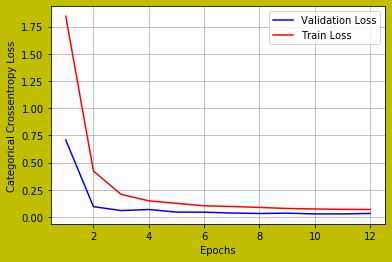

In [14]:
#evaluating model
score=convnet7.evaluate(x_test,y_test,verbose=0)
test_score7=score[0]
test_accuracy7=score[1]
train_accuracy7=max(convnet7_history.history['acc'])
print('test score :',test_score7)
print('test Accuracy :',test_accuracy7)
# error plot
x=list(range(1,epochs+1))
vy=convnet7_history.history['val_loss'] #validation loss
ty=convnet7_history.history['loss'] # train loss
plt_dynamic(x, vy, ty)

# Observation

In [0]:
from prettytable import PrettyTable
models=['3ConvNet with kernel 3x3',
        '5ConvNet with kernel 5x5',
        '7ConvNet with kernel 2x2']
training_accuracy=[train_accuracy3,train_accuracy5,train_accuracy7]
test_accuracy=[test_accuracy3,test_accuracy5,test_accuracy7]
INDEX = [1,2,3]
# Initializing prettytable
Model_Performance = PrettyTable()
# Adding columns
Model_Performance.add_column("INDEX.",INDEX)
Model_Performance.add_column("MODEL_NAME",models)
Model_Performance.add_column("TRAINING ACCURACY",training_accuracy)
Model_Performance.add_column("TESTING ACCURACY",test_accuracy)
#Model_Performance.add_column("TEST SCORE",test_score)

In [16]:
print(Model_Performance)

+--------+--------------------------+--------------------+------------------+
| INDEX. |        MODEL_NAME        | TRAINING ACCURACY  | TESTING ACCURACY |
+--------+--------------------------+--------------------+------------------+
|   1    | 3ConvNet with kernel 3x3 | 0.9954166666348775 |      0.9938      |
|   2    | 5ConvNet with kernel 5x5 | 0.9946666666666667 |      0.9951      |
|   3    | 7ConvNet with kernel 2x2 | 0.9836666666348776 |      0.9924      |
+--------+--------------------------+--------------------+------------------+
